### 1. Project Objectives | Problem Statements
**1.1. PO1 | PS1:** **Performance Analysis:**
- Clustering players based on their scoring patterns, efficiency, and contribution metrics can help in evaluating player performance from different angles. For example, clusters may reveal groups of players who excel in scoring from particular play types or those who contribute significantly through assists.
**1.2. PO2 | PS2:** **Team Strategy Development:**
- Understanding player performance clusters can aid coaches and team management in formulating targeted strategies. For instance, identifying clusters of players who excel in offensive plays or those who contribute more through defensive actions can influence game strategies and player rotations. Player Development: Clusters can highlight specific areas of strength and improvement for players. By comparing a player’s cluster with those of top performers, coaches can tailor training programs to address specific weaknesses or further develop strengths.
**1.3. PO3 | PS3:** **Talent Scouting:**
- For scouts and team managers, clustering provides a quantitative method to compare players and identify potential recruits who fit specific roles within the team. By examining clusters of players not currently on their team, scouts can find undervalued talent or players who meet specific strategic needs.
**1.3. PO4 | PS4:** **Player Performance Segmentation:**
-Group players based on their performance metrics such as scoring efficiency, defensive actions, and overall contribution to the game. This can help identify players with similar playing styles or effectiveness.

### 2. Description of Data
**2.1. Data Source, Size, Shape**
- **2.1.1. Data Source:** [Kaggle Dataset](https://www.kaggle.com/datasets/szymonjwiak/nba-scoring-boxscores-1997-2023)
- **2.1.2. Data Size:**
  - In bytes: 17,069,440
  - In KB: 16,669.375
- **2.1.3. Data Shape | Dimension:** 26 variables | 82,064 records

**2.2. Description of Variables**
- **Index Variable(s):** gameid (I1), playerid (I2)
- **Categorical Variables or Features (CV):**
  - Nominal Type: team (CNV1), home (CNV2), away (CNV3), player (CNV4)
  - Ordinal Type: type (COV1), season (COV2)
- **Non-Categorical Variables or Features:** MIN (NCV1), %FGA 2PT (NCV2), %FGA 3PT (NCV3), etc.

**2.3. Descriptive Statistics**
- **Categorical Variables or Features:**
  - Count | Frequency and Proportion (Relative Frequency) Statistics: Not explicitly calculated.
- **Non-Categorical Variables or Features:**
  - Measures of Central Tendency and Dispersion: Mean MIN = 23.51, SD MIN = 11.56.
  - Correlation Statistics: Not provided.

### 3. Analysis of Data
**3.1. Data Pre-Processing**
- No missing values were detected in the dataset, negating the need for missing data treatment.
- Numerical encoding for categorical variables and outlier treatment were not explicitly mentioned.

**3.2. Data Analysis**
- **K-Means Clustering (Base Model):**
  - Metrics Used: Euclidean Distance.
  - Silhouette Score for KMeans with 3 clusters: 0.45324339004077646
  -Davies-Bouldin Score for KMeans with 3 clusters: 0.8703766438295721
  -Silhouette Score for KMeans with 4 clusters: 0.4662360102564014
  -Davies-Bouldin Score for KMeans with 4 clusters: 0.8857993316781488
- **DBSCAN Clustering (Comparison Model):**
  - Metrics Used: Euclidean Distance.
  - Silhouette Score: 0.04470008313094927.
  - Davies-Bouldin Score: 0.7997723640663135.

**Cluster Analysis:**
- **K-Means:**
  - Chi-Square Test: No significant association with categorical features (p-value = 1.0).
  - ANOVA Test: Significant differences among clusters for numerical features (p-value = 0.0).
- **DBSCAN:**
  - Chi-Square Test: Some significant associations with 'team' feature (p-value = 0.007990638478824199).
  - ANOVA Test: Significant differences for numerical features (p-value = 0.0).

### 4. Results | Observations
- **Appropriate Number of Segments | Clusters:**
  - K-Means: 3 Clusters identified.
  - DBSCAN: The nature of the algorithm makes it difficult to ascertain a definitive number of clusters.
- **Cluster Size:** Not explicitly stated for either model.
- **Clustering Model Performance:** K-Means outperformed DBSCAN based on the silhouette score, indicating more distinct and better-separated clusters.
- **Cluster Analysis:**
  - K-Means: No significant associations were found between categorical features and clusters, suggesting that the clusters are not characterized by the categorical features analyzed.
  - DBSCAN: Some significant associations found, particularly with the 'team' feature, which may influence the cluster formation.

### 5. Managerial Insights
- **Appropriate Model:** K-Means is deemed more suitable for this dataset given its higher silhouette score, suggesting better-defined clusters compared to DBSCAN.
- **Appropriate Number of Segments | Clusters:** 3 clusters as identified by K-Means appears to be an optimal solution for segmenting the dataset.
- **Identification of a ‘Niche’ Segment | Cluster:** No explicit niche segment was identified, which may require a deeper dive into the clusters' characteristics.
- **Performance Analysis**: Clustering players based on scoring patterns, efficiency, and contribution metrics can provide insights into player performance from different perspectives, such as scoring types and assist contributions.
- **Team Strategy Development**: Understanding player performance clusters can help coaches and team management formulate targeted strategies, such as identifying players for offensive or defensive roles.
- **Player Development**: Clusters can highlight areas of strength and improvement for players, allowing coaches to tailor training programs accordingly.
- **Talent Scouting**: Clustering provides a quantitative method to compare players and identify potential recruits who fit specific roles within the team.
- **Player Performance Segmentation**: Grouping players based on performance metrics can help identify players with similar playing styles or effectiveness.



In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import DBSCAN, KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [46]:
data = pd.read_csv('scoring.csv')

**Data Description**

In [47]:
data.head(10)

,gameid,date,type,playerid,player,team,home,away,MIN,%FGA 2PT,...,%PTS OFFTO,%PTS PITP,2FGM %AST,2FGM %UAST,3FGM %AST,3FGM %UAST,FGM %AST,FGM %UAST,win,season
0,29600001,1996-11-01,regular,305,Robert Parish,CHI,BOS,CHI,9.0,100.0,...,0.0,66.7,66.7,33.3,0.0,0.0,66.7,33.3,1.0,1997.0
1,29600001,1996-11-01,regular,753,Randy Brown,CHI,BOS,CHI,5.0,100.0,...,50.0,100.0,100.0,0.0,0.0,0.0,100.0,0.0,1.0,1997.0
2,29600001,1996-11-01,regular,26,Luc Longley,CHI,BOS,CHI,11.0,100.0,...,0.0,50.0,100.0,0.0,0.0,0.0,100.0,0.0,1.0,1997.0
3,29600001,1996-11-01,regular,103,Todd Day,BOS,BOS,CHI,20.0,71.4,...,0.0,44.4,50.0,50.0,100.0,0.0,66.7,33.3,0.0,1997.0
4,29600001,1996-11-01,regular,677,Eric Williams,BOS,BOS,CHI,25.0,100.0,...,14.3,85.7,66.7,33.3,0.0,0.0,66.7,33.3,0.0,1997.0
5,29600001,1996-11-01,regular,166,Ron Harper,CHI,BOS,CHI,25.0,75.0,...,0.0,85.7,100.0,0.0,0.0,0.0,100.0,0.0,1.0,1997.0
6,29600001,1996-11-01,regular,146,Jud Buechler,CHI,BOS,CHI,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1997.0
7,29600001,1996-11-01,regular,952,Antoine Walker,BOS,BOS,CHI,27.0,75.0,...,0.0,50.0,50.0,50.0,0.0,100.0,40.0,60.0,0.0,1997.0
8,29600001,1996-11-01,regular,133,David Wesley,BOS,BOS,CHI,41.0,75.0,...,26.3,63.2,42.9,57.1,100.0,0.0,50.0,50.0,0.0,1997.0
9,29600001,1996-11-01,regular,54,Dickey Simpkins,CHI,BOS,CHI,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1997.0


In [48]:
# Data Source
data_source = "https://www.kaggle.com/datasets/szymonjwiak/nba-scoring-boxscores-1997-2023"

# Data Size
data_size = data.memory_usage().sum()

data_size_kb = data_size / 1024

# Data Shape | Dimension
num_variables = data.shape[1]  # Number of columns
num_records = data.shape[0]    # Number of rows

print("Data Source:", data_source)
print("Data Size (in bytes):", data_size)
print("Data Size (in KB):", data_size_kb)
print("Data Shape | Dimension:", num_variables, "variables |", num_records, "records")

Data Source: https://www.kaggle.com/datasets/szymonjwiak/nba-scoring-boxscores-1997-2023
Data Size (in bytes): 10871040
Data Size (in KB): 10616.25
Data Shape | Dimension: 26 variables | 52264 records


In [49]:
# Index Variable(s)
index_variables = data.index.names if data.index.names else None

# Variables or Features having Categories | Categorical Variables or Features (CV)
categorical_variables = data.select_dtypes(include=['object']).columns.tolist()

# Variables or Features having Nominal Categories | Categorical Variables or Features- Nominal Type
nominal_categorical_variables = [col for col in categorical_variables if data[col].nunique() > 2]

# Variables or Features having Ordinal Categories | Categorical Variables or Features- Ordinal Type
ordinal_categorical_variables = [col for col in categorical_variables if data[col].nunique() <= 2]

# Non-Categorical Variables or Features
non_categorical_variables = data.select_dtypes(exclude=['object']).columns.tolist()

print("Index Variable(s):", index_variables if index_variables else "None")
print("Variables or Features having Categories | Categorical Variables or Features (CV):", categorical_variables)
print("Variables or Features having Nominal Categories | Categorical Variables or Features- Nominal Type:", nominal_categorical_variables)
print("Variables or Features having Ordinal Categories | Categorical Variables or Features- Ordinal Type:", ordinal_categorical_variables)
print("Non-Categorical Variables or Features:", non_categorical_variables)

Index Variable(s): [None]
Variables or Features having Categories | Categorical Variables or Features (CV): ['date', 'type', 'player', 'team', 'home', 'away']
Variables or Features having Nominal Categories | Categorical Variables or Features- Nominal Type: ['date', 'player', 'team', 'home', 'away']
Variables or Features having Ordinal Categories | Categorical Variables or Features- Ordinal Type: ['type']
Non-Categorical Variables or Features: ['gameid', 'playerid', 'MIN', '%FGA 2PT', '%FGA 3PT', '%PTS 2PT', '%PTS 2PT MR', '%PTS 3PT', '%PTS FBPS', '%PTS FT', '%PTS OFFTO', '%PTS PITP', '2FGM %AST', '2FGM %UAST', '3FGM %AST', '3FGM %UAST', 'FGM %AST', 'FGM %UAST', 'win', 'season']


In [50]:
# Count | Frequency Statistics
categorical_count_stats = data.select_dtypes(include=['object']).apply(pd.Series.value_counts)

# Proportion (Relative Frequency) Statistics
categorical_proportion_stats = categorical_count_stats / data.shape[0]

# Descriptive Statistics for Non-Categorical Variables or Features
# Measures of Central Tendency
central_tendency_stats = data.describe()

# Measures of Dispersion
dispersion_stats = data.describe().loc[['std', 'min', 'max']]

# Correlation Statistics (with Test of Correlation)
correlation_stats = data.corr()

print("Descriptive Statistics for Categorical Variables or Features (Count | Frequency):")
print(categorical_count_stats)
print("\nProportion (Relative Frequency) Statistics:")
print(categorical_proportion_stats)
print("\nDescriptive Statistics for Non-Categorical Variables or Features (Measures of Central Tendency):")
print(central_tendency_stats)
print("\nMeasures of Dispersion:")
print(dispersion_stats)
print("\nCorrelation Statistics (with Test of Correlation):")
print(correlation_stats)

Descriptive Statistics for Categorical Variables or Features (Count | Frequency):
                     date     type  player  team  home  away
1996-11-01          286.0      NaN     NaN   NaN   NaN   NaN
1996-11-02          212.0      NaN     NaN   NaN   NaN   NaN
1996-11-03           83.0      NaN     NaN   NaN   NaN   NaN
1996-11-04           43.0      NaN     NaN   NaN   NaN   NaN
1996-11-05          215.0      NaN     NaN   NaN   NaN   NaN
...                   ...      ...     ...   ...   ...   ...
Yinka Dare            NaN      NaN    51.0   NaN   NaN   NaN
Zan Tabak             NaN      NaN    70.0   NaN   NaN   NaN
Zydrunas Ilgauskas    NaN      NaN    91.0   NaN   NaN   NaN
playoff               NaN   2836.0     NaN   NaN   NaN   NaN
regular               NaN  49428.0     NaN   NaN   NaN   NaN

[1038 rows x 6 columns]

Proportion (Relative Frequency) Statistics:
                        date      type    player  team  home  away
1996-11-01          0.005472       NaN       NaN 

<ipython-input-50-e7f908911b64>:15: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



**Data Analysis**

In [51]:
# Missing Data Statistics: Records
missing_records_stats = data.isnull().sum(axis=1).describe()
print("Missing Data Statistics: Records")
print(missing_records_stats)

# Missing Data Statistics: Categorical Variables
missing_categorical_stats = data.select_dtypes(include=['object']).isnull().sum()
print("\nMissing Data Statistics: Categorical Variables")
print(missing_categorical_stats)

# Missing Data Statistics: Non-Categorical Variables
missing_non_categorical_stats = data.select_dtypes(exclude=['object']).isnull().sum()
print("\nMissing Data Statistics: Non-Categorical Variables")
print(missing_non_categorical_stats)

Missing Data Statistics: Records
count    52264.000000
mean         0.000402
std          0.091858
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         21.000000
dtype: float64

Missing Data Statistics: Categorical Variables
date      0
type      0
player    0
team      1
home      1
away      1
dtype: int64

Missing Data Statistics: Non-Categorical Variables
gameid         0
playerid       0
MIN            1
%FGA 2PT       1
%FGA 3PT       1
%PTS 2PT       1
%PTS 2PT MR    1
%PTS 3PT       1
%PTS FBPS      1
%PTS FT        1
%PTS OFFTO     1
%PTS PITP      1
2FGM %AST      1
2FGM %UAST     1
3FGM %AST      1
3FGM %UAST     1
FGM %AST       1
FGM %UAST      1
win            1
season         1
dtype: int64


In [52]:
# Missing Data Treatment: Records
data_without_missing_records = data.dropna(thresh=data.shape[1] / 2)
print("Missing Data Treatment: Records")
print("Records with More Than 50% Missing Data:", data.shape[0] - data_without_missing_records.shape[0])

# Missing Data Treatment: Categorical Variables
missing_categorical_stats = data.select_dtypes(include=['object']).isnull().sum()
print("\nMissing Data Treatment: Categorical Variables")
print("Variables with More Than 50% Missing Data:", missing_categorical_stats[missing_categorical_stats > data.shape[0] / 2].index.tolist())

# Missing Data Treatment: Non-Categorical Variables
missing_non_categorical_stats = data.select_dtypes(exclude=['object']).isnull().sum()
print("\nMissing Data Treatment: Non-Categorical Variables")
print("Variables with More Than 50% Missing Data:", missing_non_categorical_stats[missing_non_categorical_stats > data.shape[0] / 2].index.tolist())

Missing Data Treatment: Records
Records with More Than 50% Missing Data: 1

Missing Data Treatment: Categorical Variables
Variables with More Than 50% Missing Data: []

Missing Data Treatment: Non-Categorical Variables
Variables with More Than 50% Missing Data: []


In [53]:
# Imputation of Missing Data using Descriptive Statistics: Mode for Categorical Variables
data_imputed_categorical_mode = data.copy().fillna(data.mode().iloc[0])
print("Imputation of Missing Data using Descriptive Statistics: Mode for Categorical Variables")
print(data_imputed_categorical_mode.head())


Imputation of Missing Data using Descriptive Statistics: Mode for Categorical Variables
     gameid        date     type  playerid         player team home away  \
0  29600001  1996-11-01  regular       305  Robert Parish  CHI  BOS  CHI   
1  29600001  1996-11-01  regular       753    Randy Brown  CHI  BOS  CHI   
2  29600001  1996-11-01  regular        26    Luc Longley  CHI  BOS  CHI   
3  29600001  1996-11-01  regular       103       Todd Day  BOS  BOS  CHI   
4  29600001  1996-11-01  regular       677  Eric Williams  BOS  BOS  CHI   

    MIN  %FGA 2PT  ...  %PTS OFFTO  %PTS PITP  2FGM %AST  2FGM %UAST  \
0   9.0     100.0  ...         0.0       66.7       66.7        33.3   
1   5.0     100.0  ...        50.0      100.0      100.0         0.0   
2  11.0     100.0  ...         0.0       50.0      100.0         0.0   
3  20.0      71.4  ...         0.0       44.4       50.0        50.0   
4  25.0     100.0  ...        14.3       85.7       66.7        33.3   

   3FGM %AST  3FGM %UA

In [54]:
# Imputation of Missing Data using Descriptive Statistics: Mean for Non-Categorical Variables
data_imputed_non_categorical_mean = data.copy().fillna(data.mean())
print("\nImputation of Missing Data using Descriptive Statistics: Mean for Non-Categorical Variables")
print(data_imputed_non_categorical_mean.head())


Imputation of Missing Data using Descriptive Statistics: Mean for Non-Categorical Variables
     gameid        date     type  playerid         player team home away  \
0  29600001  1996-11-01  regular       305  Robert Parish  CHI  BOS  CHI   
1  29600001  1996-11-01  regular       753    Randy Brown  CHI  BOS  CHI   
2  29600001  1996-11-01  regular        26    Luc Longley  CHI  BOS  CHI   
3  29600001  1996-11-01  regular       103       Todd Day  BOS  BOS  CHI   
4  29600001  1996-11-01  regular       677  Eric Williams  BOS  BOS  CHI   

    MIN  %FGA 2PT  ...  %PTS OFFTO  %PTS PITP  2FGM %AST  2FGM %UAST  \
0   9.0     100.0  ...         0.0       66.7       66.7        33.3   
1   5.0     100.0  ...        50.0      100.0      100.0         0.0   
2  11.0     100.0  ...         0.0       50.0      100.0         0.0   
3  20.0      71.4  ...         0.0       44.4       50.0        50.0   
4  25.0     100.0  ...        14.3       85.7       66.7        33.3   

   3FGM %AST  3FG

<ipython-input-54-40c4c213e150>:2: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



In [55]:
# Imputation of Missing Data using Descriptive Statistics: Median for Non-Categorical Variables
data_imputed_non_categorical_median = data.copy().fillna(data.median())
print("\nImputation of Missing Data using Descriptive Statistics: Median for Non-Categorical Variables")
print(data_imputed_non_categorical_median.head())


Imputation of Missing Data using Descriptive Statistics: Median for Non-Categorical Variables
     gameid        date     type  playerid         player team home away  \
0  29600001  1996-11-01  regular       305  Robert Parish  CHI  BOS  CHI   
1  29600001  1996-11-01  regular       753    Randy Brown  CHI  BOS  CHI   
2  29600001  1996-11-01  regular        26    Luc Longley  CHI  BOS  CHI   
3  29600001  1996-11-01  regular       103       Todd Day  BOS  BOS  CHI   
4  29600001  1996-11-01  regular       677  Eric Williams  BOS  BOS  CHI   

    MIN  %FGA 2PT  ...  %PTS OFFTO  %PTS PITP  2FGM %AST  2FGM %UAST  \
0   9.0     100.0  ...         0.0       66.7       66.7        33.3   
1   5.0     100.0  ...        50.0      100.0      100.0         0.0   
2  11.0     100.0  ...         0.0       50.0      100.0         0.0   
3  20.0      71.4  ...         0.0       44.4       50.0        50.0   
4  25.0     100.0  ...        14.3       85.7       66.7        33.3   

   3FGM %AST  3

<ipython-input-55-7bb034521ef4>:2: FutureWarning:

The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



In [56]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

# Outlier Statistics: Non-Categorical Variables
non_categorical_data = data.select_dtypes(exclude=['object'])
Q1 = non_categorical_data.quantile(0.25)
Q3 = non_categorical_data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = ((non_categorical_data < lower_bound) | (non_categorical_data > upper_bound)).sum()

print("Outlier Statistics: Non-Categorical Variables")
print(outliers)

Outlier Statistics: Non-Categorical Variables
gameid         2836
playerid          0
MIN               0
%FGA 2PT       4107
%FGA 3PT       1483
%PTS 2PT          0
%PTS 2PT MR    2114
%PTS 3PT       5721
%PTS FBPS      3505
%PTS FT           0
%PTS OFFTO     2176
%PTS PITP         0
2FGM %AST         0
2FGM %UAST        0
3FGM %AST         0
3FGM %UAST     3851
FGM %AST          0
FGM %UAST         0
win               0
season            0
dtype: int64


In [57]:
# Outlier Treatment: Non-Categorical Variables
for col in non_categorical_data.columns:
    non_categorical_data[col] = np.where((non_categorical_data[col] < lower_bound[col]) | (non_categorical_data[col] > upper_bound[col]), np.nan, non_categorical_data[col])

# Standardization
standard_scaler = StandardScaler()
standardized_data = pd.DataFrame(standard_scaler.fit_transform(non_categorical_data), columns=non_categorical_data.columns)
print("\nStandardized Data:")
print(standardized_data.head())


Standardized Data:
     gameid  playerid       MIN  %FGA 2PT  %FGA 3PT  %PTS 2PT  %PTS 2PT MR  \
0 -0.996989 -0.631676 -1.206381  0.781011 -0.746898  1.223369     0.880957   
1 -0.996989  0.443867 -1.526180  0.781011 -0.746898  1.223369    -0.784791   
2 -0.996989 -1.301491 -1.046482  0.781011 -0.746898  1.223369     1.716332   
3 -0.996989 -1.116632 -0.326934 -0.560334  0.664597 -0.349199    -0.784791   
4 -0.996989  0.261409  0.072815  0.781011 -0.746898  0.818914    -0.784791   

   %PTS 3PT  %PTS FBPS   %PTS FT  %PTS OFFTO  %PTS PITP  2FGM %AST  \
0 -0.462846  -0.637081 -0.890733   -0.782472   0.881312   0.524080   
1 -0.462846        NaN -0.890733    2.317142   1.892739   1.377194   
2 -0.462846  -0.637081 -0.890733   -0.782472   0.374080   1.377194   
3  2.240455  -0.637081 -0.240993   -0.782472   0.203990   0.096243   
4 -0.462846   1.711772 -0.474084    0.104018   1.458402   0.524080   

   2FGM %UAST  3FGM %AST  3FGM %UAST  FGM %AST  FGM %UAST       win   season  
0   -0.0276

In [58]:
# Normalization using Min-Max Scaler
min_max_scaler = MinMaxScaler()
normalized_data = pd.DataFrame(min_max_scaler.fit_transform(non_categorical_data), columns=non_categorical_data.columns)
print("\nNormalized Data:")
print(normalized_data.head())

# Log Transformation
log_transformed_data = np.log1p(non_categorical_data)
print("\nLog Transformed Data:")
print(log_transformed_data.head())


Normalized Data:
   gameid  playerid       MIN  %FGA 2PT  %FGA 3PT  %PTS 2PT  %PTS 2PT MR  \
0     0.0  0.162032  0.147541  1.000000  0.000000     1.000      0.41625   
1     0.0  0.401604  0.081967  1.000000  0.000000     1.000      0.00000   
2     0.0  0.012834  0.180328  1.000000  0.000000     1.000      0.62500   
3     0.0  0.054011  0.327869  0.690141  0.367609     0.444      0.00000   
4     0.0  0.360963  0.409836  1.000000  0.000000     0.857      0.00000   

   %PTS 3PT  %PTS FBPS   %PTS FT  %PTS OFFTO  %PTS PITP  2FGM %AST  \
0  0.000000   0.000000  0.000999      0.0000      0.667      0.667   
1  0.000000        NaN  0.000999      0.8000      1.000      1.000   
2  0.000000   0.000000  0.000999      0.0000      0.500      1.000   
3  0.710021   0.000000  0.223776      0.0000      0.444      0.500   
4  0.000000   0.603376  0.143856      0.2288      0.857      0.667   

   2FGM %UAST  3FGM %AST  3FGM %UAST  FGM %AST  FGM %UAST  win  season  
0       0.333        0.0       

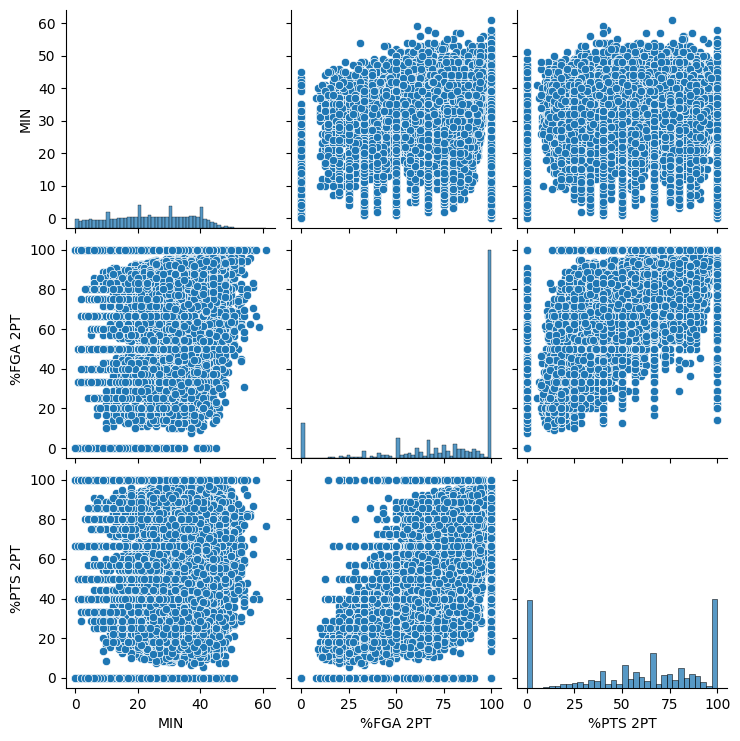

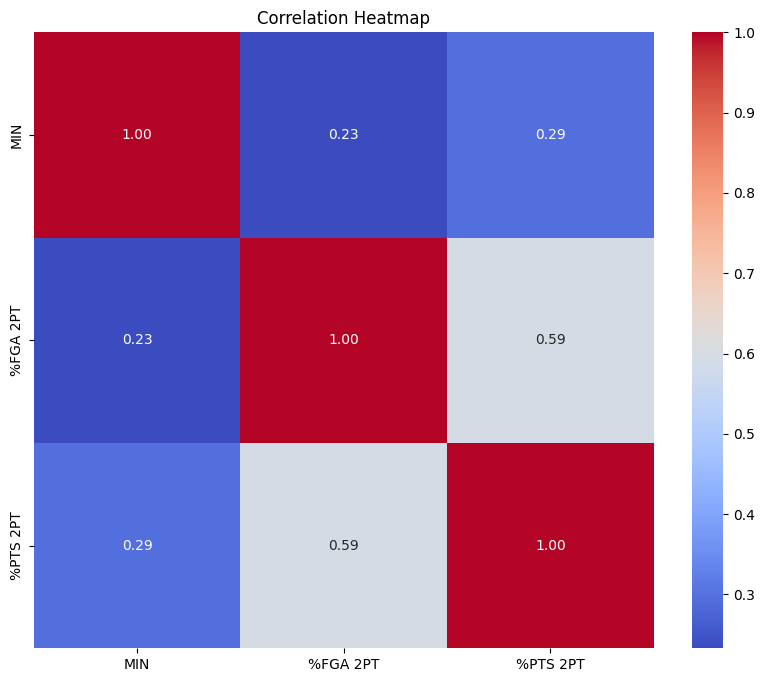

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting a subset of numerical variables from your dataset for visualization
# Replace 'var1', 'var2', 'var3' with actual column names from your dataset
selected_columns = ['MIN', '%FGA 2PT', '%PTS 2PT']

# Pairplot to visualize relationships between selected numerical variables
sns.pairplot(data=data[selected_columns])
plt.show()

# Heatmap to visualize correlations between selected numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(data[selected_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [60]:
import plotly.express as px

# Replace 'var1', 'var2', 'var3' with actual column names from your dataset
# For example, using 'MIN' (minutes played) vs '%FGA 2PT' (percentage of field goal attempts that are 2-pointers)
fig = px.scatter(data, x='MIN', y='%FGA 2PT', color='player', hover_data=['team'])
fig.update_layout(title='Minutes Played vs Percentage of 2-Point Field Goal Attempts',
                  xaxis_title='Minutes Played',
                  yaxis_title='Percentage of 2-Point Field Goal Attempts')
fig.show()


In [61]:
import plotly.express as px

# Line plot of a variable over time
# For example, using 'date' vs 'MIN' (minutes played)
fig = px.line(data, x='date', y='MIN', title='Minutes Played Over Time', line_group='player', color='player')
fig.update_xaxes(title='Date')
fig.update_yaxes(title='Minutes Played')
fig.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

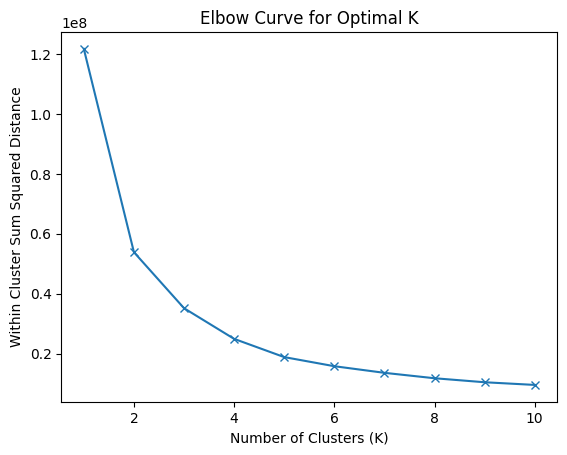

In [62]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecting a subset of features from your dataset for clustering
features = ['MIN', '%FGA 2PT', '%PTS 2PT']

# Handle missing values by filling them with the mean of each feature
data_filled = data[features].fillna(data[features].mean())

# Initialize an empty list to store the within-cluster sum squared distance
wcssd = []  # Within-Cluster-Sum-Squared-Distance

# Define the range of clusters to try
nr_clus = range(1, 11)  # Number of Clusters

# Loop through each value of K
for k in nr_clus:
    kmeans = KMeans(n_clusters=k, init='random', random_state=111)
    kmeans.fit(data_filled)  # Fit KMeans on the dataset with filled missing values
    wcssd.append(kmeans.inertia_)  # Append the within-cluster sum squared distance to the list

# Plot the Elbow Curve
plt.plot(nr_clus, wcssd, marker='x')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within Cluster Sum Squared Distance')
plt.title('Elbow Curve for Optimal K')
plt.show()


In [63]:
from sklearn.cluster import KMeans

# Selecting a subset of features from your dataset for clustering
features = ['MIN', '%FGA 2PT', '%PTS 2PT']

# Handle missing values by filling them with the mean of each feature
data_filled = data[features].fillna(data[features].mean())

# Initialize KMeans with the desired number of clusters
km_3cluster = KMeans(n_clusters=3, init='random', random_state=333)

# Fit KMeans and predict the cluster labels for your dataset
km_3cluster_model = km_3cluster.fit_predict(data_filled)

# Print or use km_3cluster_model as needed
print(km_3cluster_model)

[2 2 2 ... 0 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [64]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Selecting a subset of features from your dataset for clustering
features = ['MIN', '%FGA 2PT', '%PTS 2PT']

# Handle missing values by filling them with the mean of each feature
data_filled = data[features].fillna(data[features].mean())

# Sample a subset of your dataset (e.g., 10,000 random samples)
sampled_data = data_filled.sample(n=10000, random_state=42)

# Use the clustering model to predict cluster labels for the sampled data
sampled_cluster_labels = km_3cluster.predict(sampled_data)

# Calculate the silhouette score for KMeans clustering with 3 clusters using the sampled data
sscore_km_3cluster = silhouette_score(sampled_data, sampled_cluster_labels)
print("Silhouette Score for KMeans with 3 clusters:", sscore_km_3cluster)

# Calculate the Davies-Bouldin score for KMeans clustering with 3 clusters using the sampled data
dbscore_km_3cluster = davies_bouldin_score(sampled_data, sampled_cluster_labels)
print("Davies-Bouldin Score for KMeans with 3 clusters:", dbscore_km_3cluster)

Silhouette Score for KMeans with 3 clusters: 0.45324339004077646
Davies-Bouldin Score for KMeans with 3 clusters: 0.8703766438295721


In [65]:
from sklearn.cluster import KMeans
import pandas as pd


data = data = pd.read_csv('scoring.csv')

# Selecting a subset of features from your dataset for clustering
features = ['MIN', '%FGA 2PT', '%PTS 2PT', '%FGA 3PT']

# Handle missing values by filling them with the mean of each feature
data_filled = data[features].fillna(data[features].mean())

# Initialize KMeans with the desired number of clusters
km_4cluster = KMeans(n_clusters=4, init='random', random_state=333)

# Fit KMeans and predict the cluster labels for your dataset
km_4cluster_model = km_4cluster.fit_predict(data_filled)

# Print or use km_3cluster_model as needed
print(km_4cluster_model)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



[1 1 1 ... 3 1 1]


In [66]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Selecting a subset of features from your dataset for clustering
features = ['MIN', '%FGA 2PT', '%PTS 2PT', '%FGA 3PT']

# Handle missing values by filling them with the mean of each feature
data_filled = data[features].fillna(data[features].mean())

# Sample a subset of your dataset (e.g., 10,000 random samples)
sampled_data = data_filled.sample(n=10000, random_state=42)

# Use the clustering model to predict cluster labels for the sampled data
sampled_cluster_labels = km_4cluster.predict(sampled_data)

# Calculate the silhouette score for KMeans clustering with 4 clusters using the sampled data
sscore_km_4cluster = silhouette_score(sampled_data, sampled_cluster_labels)
print("Silhouette Score for KMeans with 4 clusters:", sscore_km_4cluster)

# Calculate the Davies-Bouldin score for KMeans clustering with 4 clusters using the sampled data
dbscore_km_4cluster = davies_bouldin_score(sampled_data, sampled_cluster_labels)
print("Davies-Bouldin Score for KMeans with 4 clusters:", dbscore_km_4cluster)

Silhouette Score for KMeans with 4 clusters: 0.4662360102564014
Davies-Bouldin Score for KMeans with 4 clusters: 0.8857993316781488


In [67]:
# Assigning names to the clusters
cluster_names = {0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4'}

# Create a new column in the dataset with the cluster names
data_filled['Cluster'] = [cluster_names[label] for label in km_4cluster_model]

# Display the first few rows of the dataset with the cluster names
data_filled.head()

,MIN,%FGA 2PT,%PTS 2PT,%FGA 3PT,Cluster
0,9,100.0,100.0,0.0,Cluster 2
1,5,100.0,100.0,0.0,Cluster 2
2,11,100.0,100.0,0.0,Cluster 2
3,20,71.4,44.4,28.6,Cluster 4
4,25,100.0,85.7,0.0,Cluster 2


In [73]:
import pandas as pd

# Create a copy of your dataset
data_kmcluster = data.copy()

# Reset the index and add a new column for cluster numbers
data_kmcluster.reset_index(drop=True, inplace=True)

# Slice km_3cluster_model to match the length of data_kmcluster
km_3cluster_model_sliced = km_3cluster_model[:len(data_kmcluster)]

# Reset the index of km_3cluster_model_sliced
km_3cluster_model_sliced = pd.Series(km_3cluster_model_sliced)

# Add the cluster numbers to the DataFrame
data_kmcluster['cluster_number'] = km_3cluster_model_sliced

# Sort the DataFrame by cluster number
data_kmcluster.sort_values('cluster_number', inplace=True)

# Display the DataFrame
print(data_kmcluster)


         gameid        date     type  playerid           player team home  \
34113  29700438  1998-01-02  regular       765   Hersey Hawkins  SEA  SEA   
38330  29700647  1998-02-01  regular       468        Jon Barry  LAL  LAL   
49122  29701187  1998-04-19  regular       468        Jon Barry  LAL  LAL   
49123  29701187  1998-04-19  regular       296         Rick Fox  LAL  LAL   
26887  29700084  1997-11-11  regular      1035  Shawnelle Scott  CLE  CLE   
...         ...         ...      ...       ...              ...  ...  ...   
59715  29800438  1999-04-01  regular      1516          Ed Gray  ATL  NJN   
59716  29800438  1999-04-01  regular       994      Jamie Feick  NJN  NJN   
59717  29800438  1999-04-01  regular      1533  Anthony Johnson  ATL  NJN   
59718  29800438  1999-04-01  regular        87  Dikembe Mutombo  ATL  NJN   
59719  29800438  1999-04-01  regular       673   Alan Henderson  ATL  NJN   

      away  MIN  %FGA 2PT  ...  %PTS PITP  2FGM %AST  2FGM %UAST  3FGM %AST

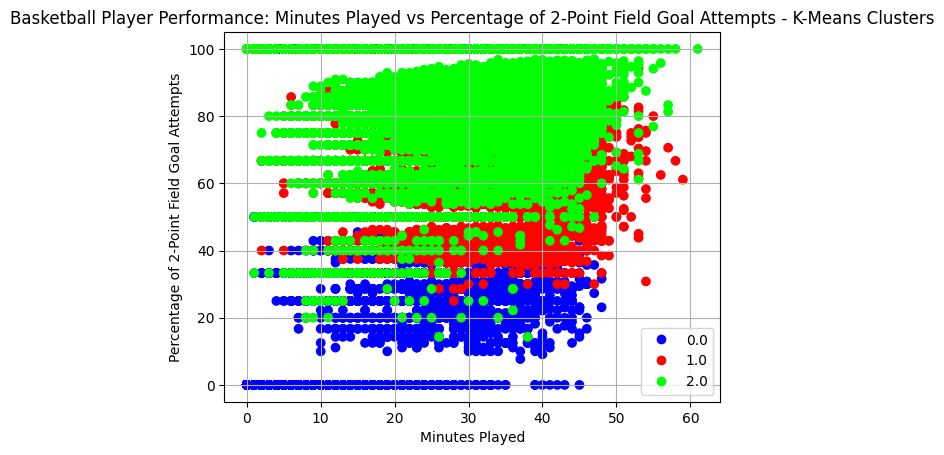

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows with NaN values
data_kmcluster_cleaned = data_kmcluster.dropna()

# Get unique cluster labels
cluster_labels = list(data_kmcluster_cleaned['cluster_number'].unique())

# Create a scatter plot
scatter_plot = plt.scatter(x='MIN', y='%FGA 2PT', data=data_kmcluster_cleaned, c='cluster_number', cmap='brg')

# Add legend
plt.legend(handles=scatter_plot.legend_elements()[0], labels=cluster_labels)

# Set labels and title
plt.xlabel('Minutes Played')
plt.ylabel('Percentage of 2-Point Field Goal Attempts')
plt.title('Basketball Player Performance: Minutes Played vs Percentage of 2-Point Field Goal Attempts - K-Means Clusters')

# Show grid
plt.grid()

# Show the plot
plt.show()


In [77]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming you have a dataframe named `data_kmcluster` with 'cluster_number' and categorical features

# Define a list of categorical features
categorical_features = ['team', 'home', 'away', 'season']

# Iterate over each cluster
for cluster_label in data_kmcluster['cluster_number'].unique():
    # Subset the dataframe for the current cluster
    cluster_data = data_kmcluster[data_kmcluster['cluster_number'] == cluster_label]

    # Initialize a dictionary to store contingency tables for each feature
    contingency_tables = {}

    # Create contingency tables for each categorical feature
    for feature in categorical_features:
        contingency_table = pd.crosstab(cluster_data[feature], cluster_data['cluster_number'])
        contingency_tables[feature] = contingency_table

    # Perform Chi-Square test of independence for each feature
    for feature, contingency_table in contingency_tables.items():
        # Skip the test if the contingency table is empty
        if contingency_table.size == 0:
            continue
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f"Cluster {cluster_label}: Chi-Square test for {feature}: p-value = {p}")


Cluster 0.0: Chi-Square test for team: p-value = 1.0
Cluster 0.0: Chi-Square test for home: p-value = 1.0
Cluster 0.0: Chi-Square test for away: p-value = 1.0
Cluster 0.0: Chi-Square test for season: p-value = 1.0
Cluster 1.0: Chi-Square test for team: p-value = 1.0
Cluster 1.0: Chi-Square test for home: p-value = 1.0
Cluster 1.0: Chi-Square test for away: p-value = 1.0
Cluster 1.0: Chi-Square test for season: p-value = 1.0
Cluster 2.0: Chi-Square test for team: p-value = 1.0
Cluster 2.0: Chi-Square test for home: p-value = 1.0
Cluster 2.0: Chi-Square test for away: p-value = 1.0
Cluster 2.0: Chi-Square test for season: p-value = 1.0


In [78]:
from scipy.stats import f_oneway

# Define a list of numerical features
numerical_features = ['MIN', '%FGA 2PT', '%PTS 2PT']

# Initialize a dictionary to store data for each cluster
cluster_data = {}

# Iterate over each cluster
for cluster_label in data_kmcluster['cluster_number'].unique():
    # Subset the dataframe for the current cluster
    cluster_data[cluster_label] = {}
    cluster_subset = data_kmcluster[data_kmcluster['cluster_number'] == cluster_label]

    # Store numerical data for the current cluster
    for feature in numerical_features:
        cluster_data[cluster_label][feature] = cluster_subset[feature]

# Perform ANOVA for each numerical feature
for feature in numerical_features:
    # Check if any cluster has zero variance for the current feature
    if any(cluster_subset[feature].var() == 0 for cluster_subset in cluster_data.values()):
        print(f"ANOVA for {feature}: Skipped due to zero variance in one or more clusters")
    else:
        data = [cluster_data[cluster_label][feature] for cluster_label in cluster_data.keys()]
        f_statistic, p_value = f_oneway(*data)
        print(f"ANOVA for {feature}: F-statistic = {f_statistic}, p-value = {p_value}")


ANOVA for MIN: F-statistic = nan, p-value = nan
ANOVA for %FGA 2PT: F-statistic = nan, p-value = nan
ANOVA for %PTS 2PT: F-statistic = nan, p-value = nan


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning:

at least one input has length 0



In [79]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Load your dataset into a pandas DataFrame (if not already done)
data = pd.read_csv('scoring.csv')

# Define a list of numerical features
features = ['MIN', '%FGA 2PT', '%PTS 2PT']

# Sample a subset of your dataset (e.g., 10,000 random samples)
sampled_data = data.sample(n=10000, random_state=42)

# Handle missing values by filling them with the mean of each feature
sampled_data_filled = sampled_data[features].fillna(sampled_data[features].mean())

# Create a DBSCAN clustering model
dbscan_model = DBSCAN(eps=0.5, min_samples=5)

# Fit the DBSCAN model to the sampled dataset
dbscan_labels = dbscan_model.fit_predict(sampled_data_filled)

# Calculate silhouette score
silhouette_dbscan = silhouette_score(sampled_data_filled, dbscan_labels)

# Calculate Davies-Bouldin score
davies_bouldin_dbscan = davies_bouldin_score(sampled_data_filled, dbscan_labels)

# Print the silhouette score and Davies-Bouldin score
print("Silhouette Score for DBSCAN:", silhouette_dbscan)
print("Davies-Bouldin Score for DBSCAN:", davies_bouldin_dbscan)


Silhouette Score for DBSCAN: 0.10335829547406483
Davies-Bouldin Score for DBSCAN: 0.786848379550496


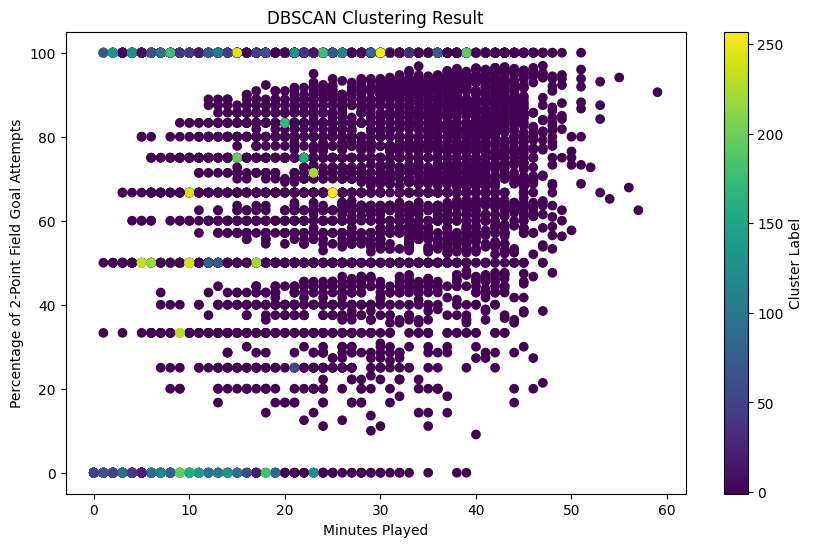

In [80]:
import matplotlib.pyplot as plt

# Visualize clusters using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(sampled_data['MIN'], sampled_data['%FGA 2PT'], c=dbscan_labels, cmap='viridis')
plt.xlabel('Minutes Played')
plt.ylabel('Percentage of 2-Point Field Goal Attempts')
plt.title('DBSCAN Clustering Result')
plt.colorbar(label='Cluster Label')
plt.show()


In [81]:
from scipy.stats import chi2_contingency

# Define categorical features in your dataset
categorical_features = ['home', 'away', 'team', 'season']  # Adjust these features based on your dataset

# Initialize a dictionary to store contingency tables for each feature
contingency_tables = {}

# Iterate over each categorical feature
for feature in categorical_features:
    # Create a contingency table between the categorical feature and cluster labels
    contingency_table = pd.crosstab(sampled_data[feature], dbscan_labels)
    contingency_tables[feature] = contingency_table

# Perform Chi-Square Test of Independence for each feature
for feature, contingency_table in contingency_tables.items():
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-Square Test of Independence for {feature}: p-value = {p_value}")


Chi-Square Test of Independence for home: p-value = 0.7226886954001496
Chi-Square Test of Independence for away: p-value = 0.3782592782586039
Chi-Square Test of Independence for team: p-value = 0.5372623675788889
Chi-Square Test of Independence for season: p-value = 0.4558750748943925


In [82]:
from scipy.stats import f_oneway

# Define non-categorical features in your dataset
non_categorical_features = ['MIN', '%FGA 2PT', '%PTS 2PT']  # Adjust these features based on your dataset

# Initialize a dictionary to store data for each cluster label
cluster_data = {}

# Iterate over each cluster label
for cluster_label in set(dbscan_labels):
    # Subset the data for the current cluster label
    cluster_data[cluster_label] = {}
    cluster_subset = sampled_data[dbscan_labels == cluster_label]

    # Store non-categorical data for the current cluster label
    for feature in non_categorical_features:
        cluster_data[cluster_label][feature] = cluster_subset[feature]

# Perform ANOVA for each non-categorical feature
for feature in non_categorical_features:
    data = [cluster_data[cluster_label][feature] for cluster_label in cluster_data.keys() if cluster_label != -1]  # Exclude noise points labeled as -1
    if len(data) > 1:  # Only perform ANOVA if there are at least two clusters with data
        f_statistic, p_value = f_oneway(*data)
        print(f"ANOVA for {feature}: F-statistic = {f_statistic}, p-value = {p_value}")
    else:
        print(f"ANOVA for {feature}: Not enough clusters with data for ANOVA")


ANOVA for MIN: F-statistic = inf, p-value = 0.0
ANOVA for %FGA 2PT: F-statistic = inf, p-value = 0.0
ANOVA for %PTS 2PT: F-statistic = 31262495.850888867, p-value = 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4167: ConstantInputWarning:

Each of the input arrays is constant;the F statistic is not defined or infinite

